In [ ]:
# Author: Ruta Kulkarni
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 136 floats

# this is our input placeholder
input_img = Input(shape=(136,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(136, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [ ]:
encoder = Model(input_img, encoded)


In [ ]:
# create a placeholder for an encoded (16-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [ ]:
import numpy as np
file = open("landmarks.txt")
lines = file.readlines()
points_list = []
for line in lines:
  points = []
  for x in line.split():
    point = []
    point.append(int(x.split(',')[0]))
    point.append(int(x.split(',')[1]))
    points.append(point)
  points_list.append(points)
input = np.asarray(points_list)
X_train = input[:550]
X_test = input[550:]


In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(550, 136)
(75, 136)


In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=75,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 550 samples, validate on 75 samples
Epoch 1/100
550/550 [==============================] - 0s 257us/step - loss: 0.7030 - val_loss: 0.6808
Epoch 2/100
550/550 [==============================] - 0s 35us/step - loss: 0.6683 - val_loss: 0.6508
Epoch 3/100
550/550 [==============================] - 0s 39us/step - loss: 0.6331 - val_loss: 0.6093
Epoch 4/100
550/550 [==============================] - 0s 39us/step - loss: 0.5885 - val_loss: 0.5663
Epoch 5/100
550/550 [==============================] - 0s 37us/step - loss: 0.5518 - val_loss: 0.5426
Epoch 6/100
550/550 [==============================] - 0s 40us/step - loss: 0.5344 - val_loss: 0.5326
Epoch 7/100
550/550 [==============================] - 0s 37us/step - loss: 0.5273 - val_loss: 0.5284
Epoch 8/100
550/550 [==============================] - 0s 39us/step - loss: 0.5241 - val_loss: 0.5259
Epoch 9/100
550/550 [==============================] - 0s 43us/step - loss: 0.5223 - val_loss: 0.5243
Epoch 10/100
550/550 [==============

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_train)
decoded_imgs = decoder.predict(encoded_imgs)

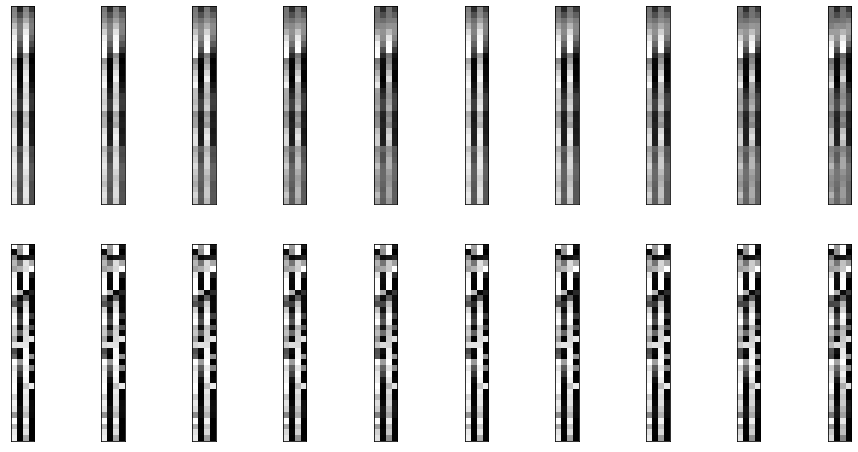

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(16, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(34, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(34, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

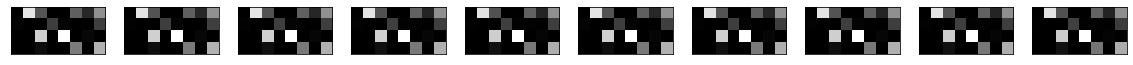

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(8, 4).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs[0]

array([ 0.        ,  0.7129159 ,  0.        ,  0.        , 38.710495  ,
        0.        ,  0.        ,  0.        , 14.179737  ,  0.        ,
       35.222076  ,  2.1742024 ,  0.        , 10.568111  ,  0.        ,
        0.        ,  0.        ,  0.94218856, 43.16597   ,  0.        ,
       16.026525  ,  0.05206518,  0.        , 20.763754  ,  6.69372   ,
        0.        ,  1.2174277 ,  0.        , 24.502483  , 10.691383  ,
        0.        , 30.007687  ], dtype=float32)